## Extracting Stock Data

### for apple stocks

1. Using yfinance to Extract Stock Info
2. Using yfinance to Extract Historical Share Price Data
3. Using yfinance to Extract Historical Dividends Data

In [1]:
!pip install yfinance
!pip install matplotlib

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.2 kB ? eta -:--:--
     - ----------------------------------- 41.0/949.2 kB 487.6 kB/s eta 0:00:02
     -- ---------------------------------- 61.4/949.2 kB 465.5 kB/s eta 0:00:02
     --- --------------------------------- 92.2/949.2 kB 521.8 kB/s eta 0:00:02
     ---- ------------------------------- 112.6/949.2 kB 504.4 kB/s eta 0:00:02
     ---- ------------------------------- 112.6/949.2 kB 504.4 kB/s eta 0:00:02
     ----- ------------------------------ 133.1/949.2 kB 392.6 kB/s eta 0:00:03
     ----- ------------------------------ 1


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import yfinance as yf   #YAHOO finance is where to get data like stocks 
import pandas as pd

### Using the yfinance Library to Extract Stock Data
Using the Ticker module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL.

In [3]:
apple = yf.Ticker("AAPL")

In [8]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
r = requests.get(url)
with open("apple.json", "wb") as f:
    f.write(r.content)


Stock Info¶

In [9]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [10]:
apple_info['country']

'United States'

In [28]:
apple_info['sector']

'Technology'

### Extracting Share Price

the data for the past year 'period=1y'

In [11]:
apple_share_price_data = apple.history(period="1y")

In [12]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-13 00:00:00-04:00,217.995439,220.862103,217.995439,220.244980,44155300,0.0,0.0
2024-08-14 00:00:00-04:00,219.548220,221.996815,218.682240,220.692886,41960600,0.0,0.0
2024-08-15 00:00:00-04:00,223.559546,224.306072,221.728059,223.678986,46414000,0.0,0.0
2024-08-16 00:00:00-04:00,222.882700,225.779224,222.613947,225.002838,44340200,0.0,0.0
2024-08-19 00:00:00-04:00,224.674371,224.943125,222.006778,224.843582,40687800,0.0,0.0


In [13]:
apple_share_price_data.reset_index(inplace=True)


In [14]:
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-08-13 00:00:00-04:00,217.995439,220.862103,217.995439,220.244980,44155300,0.0,0.0
1,2024-08-14 00:00:00-04:00,219.548220,221.996815,218.682240,220.692886,41960600,0.0,0.0
2,2024-08-15 00:00:00-04:00,223.559546,224.306072,221.728059,223.678986,46414000,0.0,0.0
3,2024-08-16 00:00:00-04:00,222.882700,225.779224,222.613947,225.002838,44340200,0.0,0.0
4,2024-08-19 00:00:00-04:00,224.674371,224.943125,222.006778,224.843582,40687800,0.0,0.0


<Axes: xlabel='Date'>

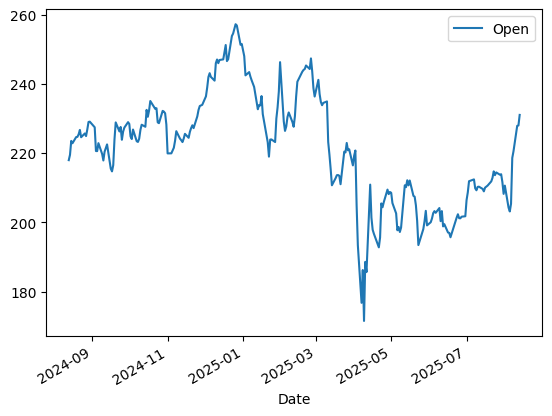

In [15]:
apple_share_price_data.plot(x="Date", y="Open")

<Axes: xlabel='Date'>

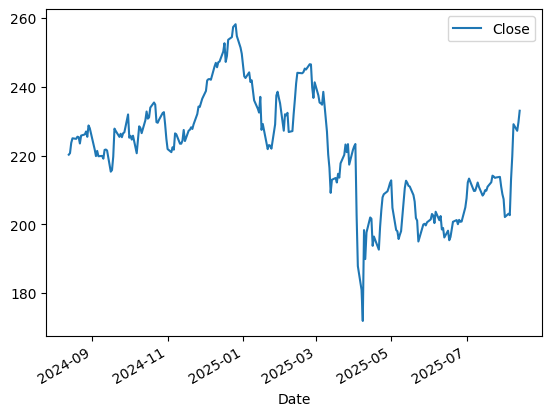

In [17]:
apple_share_price_data.plot(x="Date", y="Close")

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function

In [22]:
apple_share_price_data.Dividends

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
246    0.00
247    0.00
248    0.26
249    0.00
250    0.00
Name: Dividends, Length: 251, dtype: float64

<Axes: xlabel='Date'>

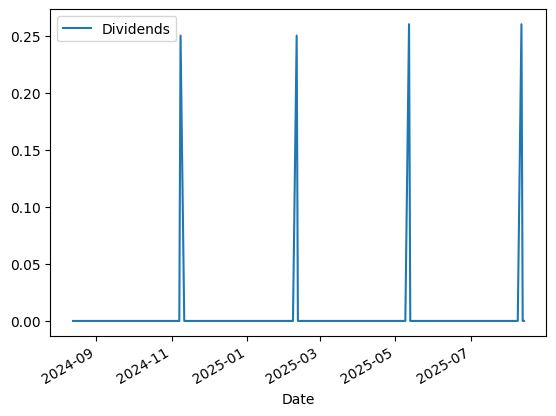

In [27]:
apple_share_price_data.plot(x="Date", y="Dividends")

In [18]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
2025-08-11 00:00:00-04:00    0.260000
Name: Dividends, Length: 88, dtype: float64

<Axes: xlabel='Date'>

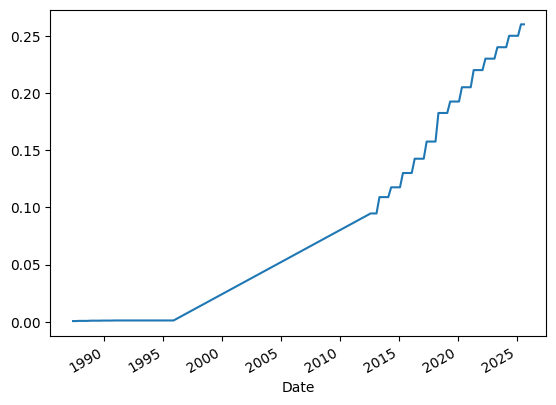

In [21]:
apple.dividends.plot()